Origem do estudo:
https://www.kaggle.com/thiagopanini/e-commerce-sentiment-analysis-eda-viz-nlp/notebook

# Caminhos dos dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
clientes = '/content/drive/MyDrive/Colab Notebooks/olist_customers_dataset.csv'
lista_pedidos = '/content/drive/MyDrive/Colab Notebooks/olist_order_items_dataset.csv'
pgto_pedidos = '/content/drive/MyDrive/Colab Notebooks/olist_order_payments_dataset.csv'
avaliacoes_pedidos = '/content/drive/MyDrive/Colab Notebooks/olist_order_reviews_dataset.csv'
pedidos = '/content/drive/MyDrive/Colab Notebooks/olist_orders_dataset.csv'
produtos = '/content/drive/MyDrive/Colab Notebooks/olist_products_dataset.csv'
vendedores = '/content/drive/MyDrive/Colab Notebooks/olist_sellers_dataset.csv'
categoria_produtos = '/content/drive/MyDrive/Colab Notebooks/product_category_name_translation.csv'

# Caminho dos arquivos do Peterson

In [ ]:
clientes = '/content/drive/MyDrive/Colab Notebooks/StackKoala/cru/olist_customers_dataset.csv'
lista_pedidos = '/content/drive/MyDrive/Colab Notebooks/StackKoala/cru/olist_order_items_dataset.csv'
pgto_pedidos = '/content/drive/MyDrive/Colab Notebooks/StackKoala/cru/olist_order_payments_dataset.csv'
avaliacoes_pedidos = '/content/drive/MyDrive/Colab Notebooks/StackKoala/cru/olist_order_reviews_dataset.csv'
pedidos = '/content/drive/MyDrive/Colab Notebooks/StackKoala/cru/olist_orders_dataset.csv'
produtos = '/content/drive/MyDrive/Colab Notebooks/StackKoala/cru/olist_products_dataset.csv'
vendedores = '/content/drive/MyDrive/Colab Notebooks/StackKoala/cru/olist_sellers_dataset.csv'
categoria_produtos = '/content/drive/MyDrive/Colab Notebooks/StackKoala/cru/product_category_name_translation.csv'

# Import libs

In [ ]:
import pandas as pd
import numpy as np

# Utilities
from viz_utils import *
from custom_transformers import *
from ml_utils import *

# lendo os csvs

In [ ]:
ds_lista_pedidos = pd.read_csv(lista_pedidos, index_col=False, encoding='utf8')
ds_pgto_pedidos = pd.read_csv(pgto_pedidos, index_col=False, encoding='utf8')
ds_avaliacoes_pedidos = pd.read_csv(avaliacoes_pedidos, index_col=False, encoding='utf8')
ds_pedidos = pd.read_csv(pedidos, index_col=False, encoding='utf8')
ds_produtos = pd.read_csv(produtos, index_col=False, encoding='utf8')
ds_vendedores = pd.read_csv(vendedores, index_col=False, encoding='utf8')
ds_clientes = pd.read_csv(clientes, index_col=False, encoding='utf8')
ds_categoria_produtos = pd.read_csv(categoria_produtos, index_col=False, encoding='utf8')

## join entre as tabelas para montar um tabelão

In [ ]:
result = ds_pedidos.merge(ds_lista_pedidos, on="order_id", how="left")

In [ ]:
result = result.merge(ds_produtos, on='product_id', how='left')

In [ ]:
result = result.merge(ds_vendedores, on='seller_id', how='left')

In [ ]:
result = result.merge(ds_clientes, on='customer_id', how='left')

In [ ]:
result = result.merge(ds_avaliacoes_pedidos, on='order_id', how='left')

In [ ]:
result = result.merge(ds_pgto_pedidos, on='order_id', how='left')

## exibindo como ficaram junções

In [ ]:
result.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12


## backup do resultado e store na pasta de dados processados

In [ ]:
transformacao_final = result.copy()

In [ ]:
transformacao_final.to_csv('/content/drive/MyDrive/Colab Notebooks/dados_transformados.csv',  index=False, encoding='utf8')

## Copia do arquivo processado na sessao do Peterson

In [ ]:
transformacao_final.to_csv('/content/drive/MyDrive/Colab Notebooks/StackKoala/processado/dados_transformados.csv',  index=False, encoding='utf8')

In [ ]:
transformacao_final.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00


In [ ]:
## Transformando *.csv em *.parquet
transformacao_final.to_parquet('/content/drive/MyDrive/Colab Notebooks/dados_transformados.parquet', index=False)

In [ ]:
#transformacao_final = transformacao_final.drop(columns=['review_comment_title'], axis=1)
#transformacao_final.head(5)

## Testando review_score
## 1-2 Ruim ou Péssimo
## 4-5 Bom ou Ótimo
## 3 Neutro

Adicionando uma coluna nova para receber novos valores de titulo

In [ ]:
transformacao_final['new_title_review'] = None

In [ ]:
def TestReviewScoreTitle():
  for index, row in transformacao_final.iterrows():
    if (transformacao_final['review_score'][index] >= 4 and transformacao_final['review_comment_title'][index] is np.nan):
        transformacao_final['new_title_review'][index] = 'bom ou otimo'
    elif (transformacao_final['review_score'][index] < 3 and transformacao_final['review_comment_title'][index] is np.nan):
          transformacao_final['new_title_review'][index] = 'ruim ou pessimo'
    elif (transformacao_final['review_score'][index] == 3 and transformacao_final['review_comment_title'][index] is np.nan):
          transformacao_final['new_title_review'][index] = 'neutro'
    else:
      transformacao_final['new_title_review'][index] = transformacao_final['review_comment_title'][index]


In [ ]:
TestReviewScoreTitle()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/py

In [ ]:
transformacao_final.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,new_title_review
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,bom ou otimo
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,bom ou otimo
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,bom ou otimo
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,boleto,1.0,141.46,Muito boa a loja
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12,bom ou otimo


## Ajustando as mensagens nulas

In [ ]:
transformacao_final['new_message_review'] = None

In [ ]:
def TestReviewScoreMessages():
  for index, row in transformacao_final.iterrows():
    if (transformacao_final['review_score'][index] >= 4 and transformacao_final['review_comment_message'][index] is np.nan):
        transformacao_final['new_message_review'][index] = 'bom ou otimo'
    elif (transformacao_final['review_score'][index] < 3 and transformacao_final['review_comment_message'][index] is np.nan):
        transformacao_final['new_message_review'][index] = 'ruim ou pessimo'
    elif (transformacao_final['review_score'][index] == 3 and transformacao_final['review_comment_message'][index] is np.nan):
        transformacao_final['new_message_review'][index] = 'neutro'
    else:
      transformacao_final['new_message_review'][index] = transformacao_final['review_comment_message'][index]

In [ ]:
TestReviewScoreMessages()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/py

In [ ]:
transformacao_final.head(50)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,new_title_review,new_message_review
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,bom ou otimo,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,bom ou otimo,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,bom ou otimo,"Não testei o produto ainda, mas ele veio corre..."
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,boleto,1.0,141.46,Muito boa a loja,Muito bom o produto.
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12,bom ou otimo,bom ou otimo
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27

# Salvando arquivo com textos processados.
Agora pode ler a partir deste arquivo.

In [ ]:
transformacao_final.to_csv('/content/drive/MyDrive/Colab Notebooks/processado/dados_transformados_tratado.csv',  index=False, encoding='utf8')

#A partir daqui Novos tratamentos no arquivo
#Tratar parte nlp nos titulos e mensagens

In [ ]:
dados_tratados = '/content/drive/MyDrive/Colab Notebooks/processado/dados_transformados_tratado.csv'
ds_dados_tratados = pd.read_csv(dados_tratados, index_col=False, encoding='utf8')
transformacao_final = ds_dados_tratados.copy() # só pra manter o mesmo nome


In [ ]:
transformacao_final.head(4)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,new_title_review,new_message_review
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,bom ou otimo,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,bom ou otimo,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,bom ou otimo,"Não testei o produto ainda, mas ele veio corre..."
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,boleto,1.0,141.46,Muito boa a loja,Muito bom o produto.


## tratando apenas reviews

In [ ]:
df_titulos_mensagens = transformacao_final[['new_message_review','review_score', 'new_title_review','order_id']]

In [ ]:
df_titulos_mensagens

,new_message_review,review_score,new_title_review,order_id
0,"Não testei o produto ainda, mas ele veio corre...",4.0,bom ou otimo,e481f51cbdc54678b7cc49136f2d6af7
1,"Não testei o produto ainda, mas ele veio corre...",4.0,bom ou otimo,e481f51cbdc54678b7cc49136f2d6af7
2,"Não testei o produto ainda, mas ele veio corre...",4.0,bom ou otimo,e481f51cbdc54678b7cc49136f2d6af7
3,Muito bom o produto.,4.0,Muito boa a loja,53cdb2fc8bc7dce0b6741e2150273451
4,bom ou otimo,5.0,bom ou otimo,47770eb9100c2d0c44946d9cf07ec65d
...,...,...,...,...
119138,So uma peça que veio rachado mas tudo bem rs,4.0,bom ou otimo,63943bddc261676b46f01ca7ac2f7bd8
119139,Foi entregue antes do prazo.,5.0,bom ou otimo,83c1379a015df1e13d02aae0204711ab
119140,Foi entregue somente 1. Quero saber do outro p...,2.0,ruim ou pessimo,11c177c8e97725db2631073c19f07b62
119141,Foi entregue somente 1. Quero saber do outro p...,2.0,ruim ou pessimo,11c177c8e97725db2631073c19f07b62


removendo o que ficou de duplicado, por conta da forma de pagamento

In [ ]:
df_titulos_mensagens = df_titulos_mensagens.drop_duplicates(subset=['order_id'])

In [ ]:
df_titulos_mensagens.describe()

,review_score
count,98673.000000
mean,4.086853
std,1.347287
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df_titulos_mensagens.head(10)

,new_message_review,review_score,new_title_review,order_id
0,"Não testei o produto ainda, mas ele veio corre...",4.0,bom ou otimo,e481f51cbdc54678b7cc49136f2d6af7
3,Muito bom o produto.,4.0,Muito boa a loja,53cdb2fc8bc7dce0b6741e2150273451
4,bom ou otimo,5.0,bom ou otimo,47770eb9100c2d0c44946d9cf07ec65d
5,O produto foi exatamente o que eu esperava e e...,5.0,bom ou otimo,949d5b44dbf5de918fe9c16f97b45f8a
6,bom ou otimo,5.0,bom ou otimo,ad21c59c0840e6cb83a9ceb5573f8159
7,bom ou otimo,4.0,bom ou otimo,a4591c265e18cb1dcee52889e2d8acc3
8,fiquei triste por n ter me atendido.,2.0,ruim ou pessimo,136cce7faa42fdb2cefd53fdc79a6098
9,bom ou otimo,5.0,bom ou otimo,6514b8ad8028c9f2cc2374ded245783f
10,ruim ou pessimo,1.0,ruim ou pessimo,76c6e866289321a7c93b82b54852dc33
11,bom ou otimo,5.0,bom ou otimo,e69bfb5eb88e0ed6a785585b27e16dbf


#SALVANDO O CSV AQUI PARA SEGUIR AMANHÃ

In [ ]:
df_titulos_mensagens.to_csv('/content/drive/MyDrive/Colab Notebooks/processado/dados_transformados_titulos_mensagens.csv',  index=False, encoding='utf8')

# Carregando os dados que foram salvos acima

In [ ]:
dados_tratados = '/content/drive/MyDrive/Colab Notebooks/processado/dados_transformados_titulos_mensagens.csv'
ds_dados_tratados = pd.read_csv(dados_tratados, index_col=False, encoding='utf8')
transformacao_final = ds_dados_tratados.copy() # só pra manter o mesmo nome


In [ ]:
transformacao_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   new_message_review  98673 non-null  object 
 1   review_score        98673 non-null  float64
 2   new_title_review    98673 non-null  object 
 3   order_id            99441 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB


In [ ]:
transformacao_final['col_tratada'] = None

esta transformação é para unificar mensagem e título quando ambas forem diferentes, caso contrário , joga para col_tratada apenas a mensagem 

In [ ]:
def ColTratada():
  for index, row in transformacao_final.iterrows():
    if (transformacao_final['new_message_review'][index] != transformacao_final['new_title_review'][index]):
      transformacao_final['col_tratada'][index] = str(transformacao_final['new_message_review'][index]) + ' ' + str(transformacao_final['new_title_review'][index])
    else:
      transformacao_final['col_tratada'][index] = str(transformacao_final['new_message_review'][index])

In [ ]:
ColTratada()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
transformacao_final.head(5)

,new_message_review,review_score,new_title_review,order_id,col_tratada
0,"Não testei o produto ainda, mas ele veio corre...",4.0,bom ou otimo,e481f51cbdc54678b7cc49136f2d6af7,"Não testei o produto ainda, mas ele veio corre..."
1,Muito bom o produto.,4.0,Muito boa a loja,53cdb2fc8bc7dce0b6741e2150273451,Muito bom o produto. Muito boa a loja
2,bom ou otimo,5.0,bom ou otimo,47770eb9100c2d0c44946d9cf07ec65d,bom ou otimo
3,O produto foi exatamente o que eu esperava e e...,5.0,bom ou otimo,949d5b44dbf5de918fe9c16f97b45f8a,O produto foi exatamente o que eu esperava e e...
4,bom ou otimo,5.0,bom ou otimo,ad21c59c0840e6cb83a9ceb5573f8159,bom ou otimo


In [ ]:
df_titulos_mensagens = transformacao_final[['review_score', 'col_tratada']]

In [ ]:
df_titulos_mensagens.to_csv('/content/drive/MyDrive/Colab Notebooks/processado/dados_transformados_col_tratada.csv',  index=False, encoding='utf8')
dados_tratados = '/content/drive/MyDrive/Colab Notebooks/processado/dados_transformados_col_tratada.csv'
ds_dados_tratados = pd.read_csv(dados_tratados, index_col=False, encoding='utf8')
transformacao_final = ds_dados_tratados.copy() # só pra manter o mesmo nome


In [ ]:
transformacao_final['col_tratada'].head(5)

0    Não testei o produto ainda, mas ele veio corre...
1                Muito bom o produto. Muito boa a loja
2                                         bom ou otimo
3    O produto foi exatamente o que eu esperava e e...
4                                         bom ou otimo
Name: col_tratada, dtype: object

# Regular expressions

Limpeza dos textos

In [ ]:
import re

## Novas linhas e quebras

In [ ]:
# removendo quebras de linha e outros caracteres especiais
def re_breakline(text_list):
    return [re.sub('[\n\r\W]', ' ', r) for r in text_list]

In [ ]:
lst_col_tratada = list(transformacao_final['col_tratada'].values)

transformacao_final['col_tratada'] = re_breakline(lst_col_tratada)

In [ ]:
transformacao_final['col_tratada'].head(5)

0    Não testei o produto ainda  mas ele veio corre...
1                Muito bom o produto  Muito boa a loja
2                                         bom ou otimo
3    O produto foi exatamente o que eu esperava e e...
4                                         bom ou otimo
Name: col_tratada, dtype: object

## Sites links

In [ ]:
def re_hiperlinks(text_list):
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', r) for r in text_list]

In [ ]:
transformacao_final['col_tratada'] = re_hiperlinks(transformacao_final['col_tratada'])

In [ ]:
transformacao_final['col_tratada'].head(5)

0    Não testei o produto ainda  mas ele veio corre...
1                Muito bom o produto  Muito boa a loja
2                                         bom ou otimo
3    O produto foi exatamente o que eu esperava e e...
4                                         bom ou otimo
Name: col_tratada, dtype: object

Removendo espaços em branco

In [ ]:
def re_whitespaces(text_list):
    white_spaces = [re.sub('\s+', ' ', r) for r in text_list]
    white_spaces_end = [re.sub('[ \t]+$', '', r) for r in white_spaces]
    return white_spaces_end

In [ ]:
lista_textos = re_whitespaces(transformacao_final['col_tratada'])

In [ ]:
transformacao_final['col_tratada'] = lista_textos

In [ ]:
transformacao_final['col_tratada'].head(5)

0    Não testei o produto ainda mas ele veio corret...
1                 Muito bom o produto Muito boa a loja
2                                         bom ou otimo
3    O produto foi exatamente o que eu esperava e e...
4                                         bom ou otimo
Name: col_tratada, dtype: object

## Datas

In [ ]:
def re_dates(text_list):
    pattern = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}'
    return [re.sub(pattern, ' data ', r) for r in text_list]

In [ ]:
transformacao_final['col_tratada'] = re_dates(transformacao_final['col_tratada'])

## Moeda

In [ ]:
def re_money(text_list):
    pattern = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    return [re.sub(pattern, ' dinheiros ', r) for r in text_list]

In [ ]:
transformacao_final['col_tratada'] = re_money(transformacao_final['col_tratada'])

In [ ]:
transformacao_final['col_tratada'].head(4)

0    Não testei o produto ainda mas ele veio corret...
1                 Muito bom o produto Muito boa a loja
2                                         bom ou otimo
3    O produto foi exatamente o que eu esperava e e...
Name: col_tratada, dtype: object

## Números

In [ ]:
def re_numbers(text_list):
    return [re.sub('[0-9]+', ' numero ', r) for r in text_list]

In [ ]:
transformacao_final['col_tratada'] = re_numbers(transformacao_final['col_tratada'])

## Negação

In [ ]:
def re_negation(text_list):
    return [re.sub('([nN][ãÃaA][oO]|[ñÑ]| [nN] )', ' negação ', r) for r in text_list]

In [ ]:
transformacao_final['col_tratada'] = re_negation(transformacao_final['col_tratada'])

In [ ]:
transformacao_final['col_tratada'].head(4)

0     negação  testei o produto ainda mas ele veio ...
1                 Muito bom o produto Muito boa a loja
2                                         bom ou otimo
3    O produto foi exatamente o que eu esperava e e...
Name: col_tratada, dtype: object

## Espaço em branco inicio e fim de frase

In [ ]:
def re_whitespaces(text_list):
    white_spaces = [re.sub('\s+', ' ', r) for r in text_list]
    white_spaces_end = [re.sub('[ \t]+$', '', r) for r in white_spaces]
    return white_spaces_end

In [ ]:
transformacao_final['col_tratada'] = re_whitespaces(transformacao_final['col_tratada'])

In [ ]:
transformacao_final['col_tratada'].head(4)

0     negação testei o produto ainda mas ele veio c...
1                 Muito bom o produto Muito boa a loja
2                                         bom ou otimo
3    O produto foi exatamente o que eu esperava e e...
Name: col_tratada, dtype: object

## Stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer

teste

In [ ]:
pt_stopwords = stopwords.words('portuguese')
print(f'Total portuguese stopwords in the nltk.corpous module: {len(pt_stopwords)}')
pt_stopwords[:10]

Total portuguese stopwords in the nltk.corpous module: 204


['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

fim do teste

In [ ]:
# Defining a function to remove the stopwords and to lower the comments
def stopwords_removal(text, cached_stopwords=stopwords.words('portuguese')):
    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]

In [ ]:
lst_col_tratada1 = list(transformacao_final['col_tratada'].values)

transformacao_final['col_tratada'] = [' '.join(stopwords_removal(lst_col_tratada1)) for lst_col_tratada1 in transformacao_final['col_tratada'].values]

In [ ]:
transformacao_final['col_tratada'].head(5)

0    negação testei produto ainda veio correto boas...
1                                 bom produto boa loja
2                                            bom otimo
3    produto exatamente esperava descrito site cheg...
4                                            bom otimo
Name: col_tratada, dtype: object

## Stemming 

In [ ]:
 import nltk ## caso inicie daqui
 nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
def stemming_process(text, stemmer=RSLPStemmer()):    
    return [stemmer.stem(c) for c in text.split()]

In [ ]:
 lst_stemming = [' '.join(stemming_process(lst_col_tratada1)) for lst_col_tratada1 in transformacao_final['col_tratada'].values ]
 transformacao_final['col_tratada'] = lst_stemming

In [ ]:
lst_stemming

['neg test produt aind vei corret boa cond apen caix vei bem amass danific fic chat poi trat pres bom otim',
 'bom produt boa loj',
 'bom otim',
 'produt exat esper descrit sit cheg bem ant dat prev bom otim',
 'bom otim',
 'bom otim',
 'fiq trist neg ter atend ruim pess',
 'bom otim',
 'ruim pess',
 'bom otim',
 'aguard retorn loj ruim pess',
 'bom otim',
 'bom otim',
 'bom otim',
 'gost produt bom otim',
 'obrig atenç loj lannist perfeit tud not dez',
 'nan nan',
 'bom otim',
 'bom otim',
 'bom otim',
 'correi estä grev näo receb nenhum avis atras qq form empr respons dev dar algum respost sobr atras ruim pess',
 'bom otim',
 'neutr',
 'bom otim',
 'sempr vou compr aqu poi melhor parabém ótim',
 'dem entreg pass praz aind neg receb encomend ruim pess',
 'moment neg receb produt prote colchã berç algod imperme fiz reclam desd dia numer numer aind neg obtiv retorn ire cancel ped estorn compr hj neg recom',
 'lind acab incri muir maci sup cont bom otim',
 'bom otim',
 'bom otim',
 'prod

In [ ]:
transformacao_final['col_tratada'].head(5)

0    neg test produt aind vei corret boa cond apen ...
1                                   bom produt boa loj
2                                             bom otim
3    produt exat esper descrit sit cheg bem ant dat...
4                                             bom otim
Name: col_tratada, dtype: object

# Salvando dia 13/01
dados_transformados_final.csv

In [ ]:
transformacao_final.to_csv('/content/drive/MyDrive/Colab Notebooks/processado/dados_transformados_final.csv', index=False, encoding='utf8')
dados_tratados = '/content/drive/MyDrive/Colab Notebooks/processado/dados_transformados_final.csv'
ds_dados_tratados = pd.read_csv(dados_tratados, index_col=False, encoding='utf8')
transformacao_final = ds_dados_tratados.copy() # só pra manter o mesmo nome

# a partir daqui a noite vamos começar a brincadeira

In [ ]:
transformacao_final

,review_score,col_tratada
0,4.0,neg test produt aind vei corret boa cond apen ...
1,4.0,bom produt boa loj
2,5.0,bom otim
3,5.0,produt exat esper descrit sit cheg bem ant dat...
4,5.0,bom otim
...,...,...
99436,5.0,bom otim
99437,4.0,so peç vei rach tud bem rs bom otim
99438,5.0,entreg ant praz bom otim
99439,2.0,entreg soment numer quer sab outr produt ruim ...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
def extract_features_from_corpus(corpus, vectorizer, df=False):
    """
    Args
    ------------
    text: text to be transformed into a document-term matrix [type: string]
    vectorizer: engine to be used in the transformation [type: object]
    """
    
    # Extracting features
    corpus_features = vectorizer.fit_transform(corpus).toarray()
    features_names = vectorizer.get_feature_names()
    
    # Transforming into a dataframe to give interpetability to the process
    df_corpus_features = None
    if df:
        df_corpus_features = pd.DataFrame(corpus_features, columns=features_names)
    
    return corpus_features, df_corpus_features

In [ ]:
# Creating an object for the CountVectorizer class
count_vectorizer = CountVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=pt_stopwords)

# Extracting features for the corpus
countv_features, df_countv_features = extract_features_from_corpus(lst_stemming, count_vectorizer, df=True)
print(f'Shape of countv_features matrix: {countv_features.shape}\n')
print(f'Example of DataFrame of corpus features:')
df_countv_features.head()

Shape of countv_features matrix: (99441, 300)

Example of DataFrame of corpus features:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abr,acab,ach,acontec,acord,ador,adquir,agor,aguard,aind,algum,além,amass,ame,ant,anunci,anúnci,apen,apes,após,assim,ate,atend,atras,avali,baix,baratheon,bast,bem,boa,bols,bom,bonit,busc,cab,cad,cade,caix,cancel,cap,...,sit,so,sobr,solicit,solt,soment,stark,sup,super,tamanh,tapet,targaryen,tec,temp,tent,ter,test,tod,top,total,trabalh,transport,troc,tud,unidad,us,uso,vai,val,vc,vei,vem,vend,ver,vez,vier,volt,vou,ótim,únic
0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
!pip install folium --upgrade

     |████████████████████████████████| 95 kB 2.3 MB/s 
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.12.1.post1 which is incompatible.


In [ ]:
# Standard libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import json
import requests
import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

# DataPrep
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import joblib

#from dev.training.project_transformers import ColumnMapping
from custom_transformers import import_data, DropNullData, DropDuplicates
from text_utils import re_breakline, re_dates, re_hiperlinks, re_money, re_negation, re_numbers, \
    re_special_chars, re_whitespaces, ApplyRegex, StemmingProcess, StopWordsRemoval

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

In [ ]:
%matplotlib inline

In [ ]:
transformacao_final

,review_score,col_tratada
0,4.0,neg test produt aind vei corret boa cond apen ...
1,4.0,bom produt boa loj
2,5.0,bom otim
3,5.0,produt exat esper descrit sit cheg bem ant dat...
4,5.0,bom otim
...,...,...
99436,5.0,bom otim
99437,4.0,so peç vei rach tud bem rs bom otim
99438,5.0,entreg ant praz bom otim
99439,2.0,entreg soment numer quer sab outr produt ruim ...


In [ ]:
# Labelling data
score_map = {
    1: 'negativo',
    2: 'negativo',
    3: 'neutro',
    4: 'positivo',
    5: 'positivo'
}
transformacao_final['sentiment_label'] = transformacao_final['review_score'].map(score_map)

# Verifying results
fig, ax = plt.subplots(figsize=(7, 7))
%matplotlib inline
#plt.show(transformacao_final.query('sentiment_label in ("positivo", "negativo")'), 'sentiment_label', 
#           label_names=transformacao_final.query('sentiment_label in ("positivo", "negativo")')['sentiment_label'].value_counts().index,
#           ax=ax, colors=['darkslateblue', 'crimson'])

In [ ]:
transformacao_final = transformacao_final.dropna()
transformacao_final = transformacao_final.drop_duplicates()
transformacao_final.count()

review_score       34913
col_tratada        34913
sentiment_label    34913
dtype: int64

In [ ]:
def ngrams_count(corpus, ngram_range, n=-1, cached_stopwords=stopwords.words('portuguese')):
    """
    Args
    ----------
    corpus: text to be analysed [type: pd.DataFrame]
    ngram_range: type of n gram to be used on analysis [type: tuple]
    n: top limit of ngrams to be shown [type: int, default: -1]
    """
    
    # Using CountVectorizer to build a bag of words using the given corpus
    vectorizer = CountVectorizer(stop_words=cached_stopwords, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    total_list = words_freq[:n]
    
    # Returning a DataFrame with the ngrams count
    count_df = pd.DataFrame(total_list, columns=['ngram', 'count'])
    return count_df

In [ ]:
# Splitting the corpus into positive and negative comments
positive_comments = transformacao_final.query('sentiment_label == "positivo"')['col_tratada']
negative_comments = transformacao_final.query('sentiment_label == "negativo"')['col_tratada']

# Extracting the top 10 unigrams by sentiment
unigrams_pos = ngrams_count(positive_comments, (1, 1), 10)
unigrams_neg = ngrams_count(negative_comments, (1, 1), 10)

# Extracting the top 10 unigrams by sentiment
bigrams_pos = ngrams_count(positive_comments, (2, 2), 10)
bigrams_neg = ngrams_count(negative_comments, (2, 2), 10)

# Extracting the top 10 unigrams by sentiment
trigrams_pos = ngrams_count(positive_comments, (3, 3), 10)
trigrams_neg = ngrams_count(negative_comments, (3, 3), 10)

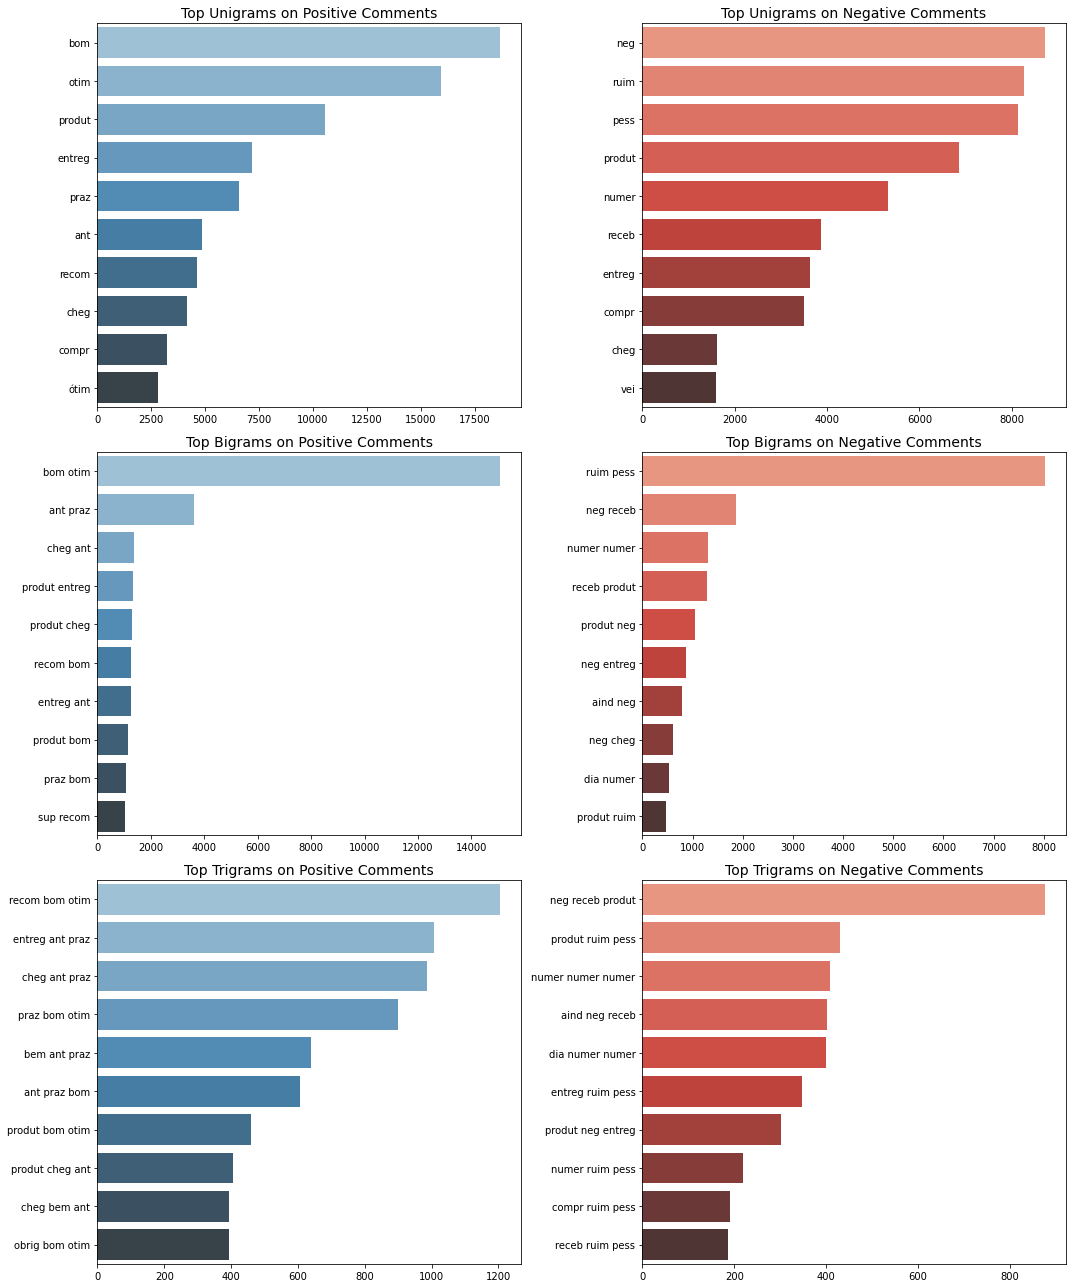

In [ ]:
# Joining everything in a python dictionary to make the plots easier
ngram_dict_plot = {
    'Top Unigrams on Positive Comments': unigrams_pos,
    'Top Unigrams on Negative Comments': unigrams_neg,
    'Top Bigrams on Positive Comments': bigrams_pos,
    'Top Bigrams on Negative Comments': bigrams_neg,
    'Top Trigrams on Positive Comments': trigrams_pos,
    'Top Trigrams on Negative Comments': trigrams_neg,
}

# Plotting the ngrams analysis
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
i, j = 0, 0
colors = ['Blues_d', 'Reds_d']
for title, ngram_data in ngram_dict_plot.items():
    ax = axs[i, j]
    sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax, palette=colors[j])
    
    # Customizing plots
    #format_spines(ax, right_border=False)
    ax.set_title(title, size=14)
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Incrementing the index
    j += 1
    if j == 2:
        j = 0
        i += 1
plt.tight_layout()
plt.show()